In [18]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Recargar el archivo
file_path = "housing.csv"
df = pd.read_csv(file_path)

target = 'median_house_value'


### Crea una regresión lineal con cross validation

In [2]:
# Dummies y NAS
df = pd.get_dummies(df)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [3]:
# Define X, y
X = df.copy()
X = X.drop(columns=[target])
y = df[target]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.3, random_state=42)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_lineal = model.predict(X_test)
r2_score(y_pred=predicciones_lineal, y_true=y_test)

0.639578538052374

In [8]:
## Crea una función de calibracion
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q = bins, labels=False) + 1
    grouped = df_calibracion.groupby('bins').mean()
    plt.plot(grouped.predicciones, grouped.y, marker='o', label = 'Modelo', color = 'blue')
    plt.plot(grouped.predicciones, grouped.predicciones, marker='o', label = 'Real', color = 'red')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.legend()
    plt.grid()

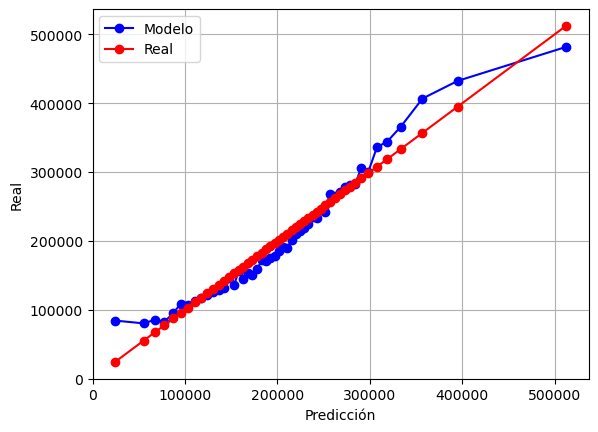

In [10]:
calibracion(predicciones_lineal, y_test, 50)

### Standard escaler

Escalar valor a media 0 y varianza 1


$Z = \frac{x - \mu}{\sigma}$


In [16]:
from sklearn.preprocessing import StandardScaler
X_prueba = df[['total_rooms', 'median_income']]
X_prueba_escalada = StandardScaler().fit_transform(X_prueba)

In [17]:
X_prueba_escalada

array([[-0.8048191 ,  2.34476576],
       [ 2.0458901 ,  2.33223796],
       [-0.53574589,  1.7826994 ],
       ...,
       [-0.17499526, -1.14259331],
       [-0.35559977, -1.05458292],
       [ 0.06840827, -0.78012947]])

### Polinomio grado 2 y escalamiento

In [21]:

degree = 2

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_2 = model.predict(X_test)
r2_score(y_pred=predicciones_poly_2, y_true=y_test)

0.6855523416341065

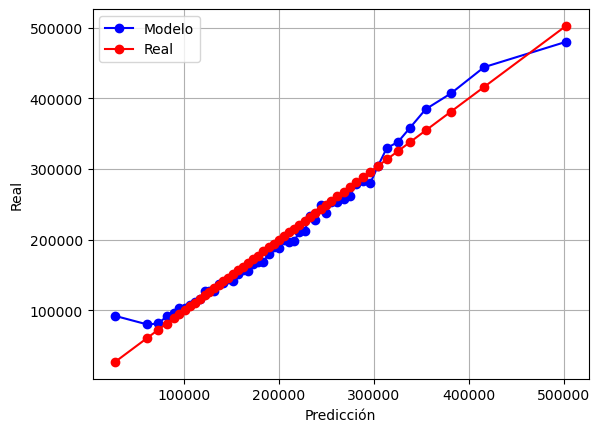

In [22]:
calibracion(predicciones_poly_2, y_test, 50)

#### Polinomio grado 3

In [23]:
degree = 3

# Aplicar StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly_3 = model.predict(X_test)
r2_score(y_pred=predicciones_poly_3, y_true=y_test)


0.7262781624521403

### Feature engenieering 

Per room
* Population per room
* Bedrooms per room

Per household
* Population per household
* Rooms per household
* Bedrooms per household

Per population
* Income per person
* Rooms per person

Transformaciones
* Logaritmo ingreso
* Raíz de total rooms 
* Median income **2 

In [9]:
# Correlación 


In [10]:
# Define los valores numericos


### Realiza un bivariado de las variables numericas


### Regresion lineal feature eng

In [10]:
## vuelve a empezar

# Dummies

# Crear dataset con las variables seleccionadas


# Manejo de valores nulos (rellenar con la mediana)

# División en conjunto de entrenamiento y prueba

# Entrenar modelo con interacciones


# PRedicicones 


### Regresion polinomial grado 2 feature eng 

In [11]:

degree = 2

# Aplicar StandardScaler

# Poli

# Ajustar el modelo de regresión lineal

# Predicicones


### Regresion polinomial grado 3 feature eng 

In [12]:

degree = 3

# Aplicar StandardScaler

# Ajustar el modelo de regresión lineal

# Prediccions


### Transformar numericos a categoricos 

In [16]:
# Numericos ni ocean_proximity ni median_house_value

# X = df.copy() y drop target


In [15]:
# División en conjunto de entrenamiento y prueba

# Crea funcion bins para las variables numericas 

# Aplica la foruma de bins a x_trian y x_test

# Bin features


# Final features 

# Apply get dummies to both pd.get_dummies(X_train[final_features], columns=bin_features, drop_first=True)

# Entrenar modelo con interacciones

